# Visualisation of the tuning parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import re

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


Idea: create a heatmap for each dataset to see which parameters values are the best

# Step 1: exract the data from the results file
Info needed: for each dataset, extract the performance percentage (for velo and long) for each pruning treshold value and TRESHOLD values. (10 heatmap per dataset for each avriable)


In [6]:
filename = project_root +"/results/test_tuning.txt"
print(filename)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub/results/test_tuning.txt


In [14]:

with open(filename, "r") as f:
    data = f.read()

print(data)
results = []

for match in re.finditer(r"Experiment (.+?)\n.*?pruning_tr=([\d.]+).*?velo :[^\n]+\n\s+velo : ([\d.]+)%[^\n]+\n\s+long : ([\d.]+)%[^\n]+\n", data, re.DOTALL):
    exp_name = match.group(1)
    print(exp_name)
    pruning_tr = float(match.group(2))
    velo_percent = float(match.group(3))
    long_percent = float(match.group(4))
    results.append((exp_name, pruning_tr, velo_percent, long_percent))

print(results)



 Experiment Test of the Hopfield network on the 1th sample minibias dataset with pruning_tr=0.01 and thres=0.01

Upgraded network - Configuration test on 10 events from the 1th sample of minibias dataset (Samples_51_to_663_hits) with 
 halfbif,
 pruning_tr=0.01, 
 thres=0.01
Number of events: 10
Parameters: {'random_neuron_init': True, 'binary_states': False, 'ALPHA': 1, 'BETA': 10, 'GAMMA': 10, 'narrowness': 200, 'constant_factor': 0.9, 'monotone_constant_factor': 0.9, 'T': 1e-08, 'B': 1e-06, 'T_decay': <function <lambda> at 0x7fe4a8e5a280>, 'B_decay': <function <lambda> at 0x7fe4a8e5a310>, 'decay_off': False, 'randomized_updates': True, 'fully_randomized_updates': False, 'maxActivation': True, 'THRESHOLD': 0.01, 'convergence_threshold': 5e-08, 'bootstrap_iters': 10, 'bootstrap_method': 'below_mean', 'smart': True, 'only_weight': False, 'max_activation': False, 'pruning_tr': 0.01}
Total time to run all the Hopfield Networks: 2 mins 8.17 seconds.
Average number of iterations per conve

In [15]:
import re

with open(filename) as f:
    data = f.read()

# Extracting information for each experiment
experiments = re.findall(r"Experiment(.+?)_tr=(\d\.\d+).+?velo\s:\s+(\d+)\s+from\s+(\d+).+?long\s:\s+(\d+)\s+from\s+(\d+)", data, re.DOTALL)

# Printing the extracted information
for exp in experiments:
    print(f"Pruning Tr: {exp[1]}")
    print(f"Velo 1st %: {exp[2]} / {exp[3]}")
    print(f"Long 1st %: {exp[4]} / {exp[5]}")
    print()


Pruning Tr: 0.01
Velo 1st %: 511 / 622
Long 1st %: 147 / 153

Pruning Tr: 0.01
Velo 1st %: 508 / 622
Long 1st %: 147 / 153



In [27]:
def get_recon_eff_experiments_2(exp_name):
    # Get file path
    file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
    with open(file_path, "r") as f:
        file_contents = f.read()

    # Define experiments
    experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
    performance_dict = {}
    title_dict = {}

    # Loop over each experiment in the file
    for experiment in experiments:
        title = re.search(r"Experiment.*", experiment).group()
        text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()

        pattern_title = r'sample\s*=\s*(\d+).*pruning_tr\s*=\s*([\d.]+).*thres\s*=\s*([\d.]+)'
        match_title = re.search(pattern_title, title)
        title_dict = {'sample': int(match_title.group(1)),
                    'pruning_tr': float(match_title.group(2)),
                    'tresh': float(match_title.group(3))}


    # Define regular expressions to extract percentages
        pattern = r"\b(velo|long|long>5GeV|long_strange|long_strange>5GeV)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"
        matches = re.findall(pattern, text)
        dictionary = {match[0]: f"{match[1]}, {match[2]}" for match in matches}


        # Add the title and metrics to the results dictionary
        performance_dict[title_dict] = dictionary

    # Return the results dictionary
    return performance_dict

In [33]:
exp_name= 'test_tuning'
file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
with open(file_path, "r") as f:
    file_contents = f.read()

    # Define experiments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
performance_dict = {}
title_dic = {}

print(len(experiments))


2


In [46]:
import re

text = 'Experiment Test of the Hopfield network on the 1th sample minibias dataset with pruning_tr=0.01 and thres=0.05'

sample = re.search(r'\d+(?=th)', text).group()
pruning_tr = re.search(r'(?<=pruning_tr=)\d+\.\d+', text).group()
thresh = re.search(r'(?<=thres=)\d+\.\d+', text).group()

print('Sample:', sample)
print('Pruning Tr:', pruning_tr)
print('Threshold:', thresh)


Sample: 1
Pruning Tr: 0.01
Threshold: 0.05


In [49]:
import re

text = 'Experiment Test of the Hopfield network on the 1th sample minibias dataset with pruning_tr=0.01 and thres=0.05'

sample = int(re.search(r'\d+(?=th)', text).group())
pruning_tr = float(re.search(r'(?<=pruning_tr=)\d+\.\d+', text).group())
thresh = float(re.search(r'(?<=thres=)\d+\.\d+', text).group())

result_dict = {'sample': sample, 'pruning_tr': pruning_tr, 'thresh': thresh}

print(result_dict)



{'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.05}


In [55]:
results_dict = {}

for experiment in experiments:

        title = re.search(r"Experiment.*", experiment).group()
        text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()

        #Work on title
        sample = int(re.search(r'\d+(?=th)', title).group())
        pruning_tr = float(re.search(r'(?<=pruning_tr=)\d+\.\d+', title).group())
        thresh = float(re.search(r'(?<=thres=)\d+\.\d+', title).group())
        title_dict = {'sample': sample, 'pruning_tr': pruning_tr, 'thresh': thresh}

        #Work on the text
        pattern = r"\b(velo|long|long>5GeV|long_strange|long_strange>5GeV)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"
        matches = re.findall(pattern, text)
        perf_dict = {match[0]: f"{match[1]}, {match[2]}" for match in matches}

        # Add the title and metrics to the results dictionary
        result_dict = {**title_dict, **perf_dict}
    # Return the results dictionary

print(result_dict)

{'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.02, 'velo': '81.7, 83.1', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}


In [106]:
def get_recon_eff_experiments_tuning(exp_name):
    # Get file path
    file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
    with open(file_path, "r") as f:
        file_contents = f.read()

    # Define experiments
    experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
    perf_dict = {}
    title_dict = {}
    result_dict = {}
    
    results_list = []

    # Loop over each experiment in the file
    for experiment in experiments:
        title = re.search(r"Experiment.*", experiment).group()

        #Add a condition if the results is intermediary and so a text is not complete yet
        try:
            text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
        except AttributeError:
            print(f"Skipping experiment: {title}")
            continue


        #Work on the title
        sample = int(re.search(r'\d+(?=th)', title).group())
        pruning_tr = float(re.search(r'(?<=pruning_tr=)\d+\.\d+', title).group())
        thresh = float(re.search(r'(?<=thres=)\d+\.\d+', title).group())
        title_dict = {'sample': sample, 'pruning_tr': pruning_tr, 'thresh': thresh}

        #Work on the text
        pattern = r"\b(velo|long|long>5GeV|long_strange|long_strange>5GeV)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"
        matches = re.findall(pattern, text)
        perf_dict = {match[0]: f"{match[1]}, {match[2]}" for match in matches}

        # Group both dictionnary together
        result_dict = {**title_dict, **perf_dict}

        # Add result_dict to results_list
        results_list.append(result_dict)

    # Return the results dictionary
    return results_list

In [131]:
test= get_recon_eff_experiments_tuning('test_tuning')
print(test)

[{'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.01, 'velo': '82.2, 84.0', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.02, 'velo': '81.7, 83.1', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}]


In [138]:
test= get_recon_eff_experiments_tuning('results_minibias_samples_hits_tuning_parameters')
print(test)
print(len(test))

Skipping experiment: Experiment Test of the Hopfield network on the 2th sample minibias dataset with pruning_tr=0.1 and thres=0.05
[{'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.01, 'velo': '82.2, 84.0', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.02, 'velo': '81.7, 83.1', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.03, 'velo': '82.6, 83.7', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.04, 'velo': '82.6, 84.4', 'long': '96.1, 95.2', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.05, 'velo': '83.3, 84.8', 'long': '96.7, 96.4', 'long>5GeV

In [139]:
def select_dicts(list_dic, value):
    return [d for d in list_dic if d.get(list(d.keys())[0]) == value]

experiment_1 = select_dicts(test,1)
print(experiment_1)
print(len(experiment_1))


[{'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.01, 'velo': '82.2, 84.0', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.02, 'velo': '81.7, 83.1', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.03, 'velo': '82.6, 83.7', 'long': '96.1, 95.1', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.04, 'velo': '82.6, 84.4', 'long': '96.1, 95.2', 'long>5GeV': '95.7, 93.6', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 0.05, 'velo': '83.3, 84.8', 'long': '96.7, 96.4', 'long>5GeV': '97.1, 96.3', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, {'sample': 1, 'pruning_tr': 0.01, 'thresh': 

# 2. Heatmap creation

Text(0.5, 1.0, 'Velo heatmap')

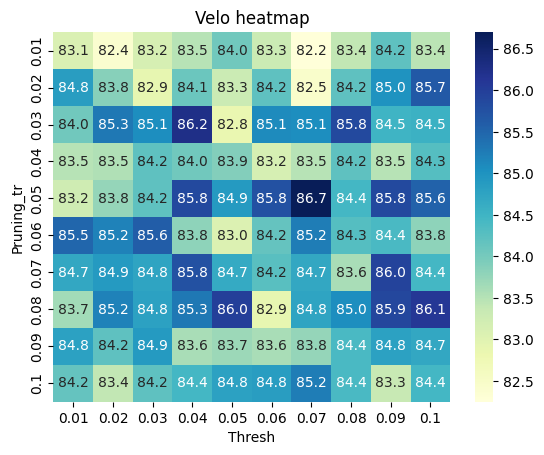

In [127]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame.from_records(experiment_1)

# Split the velo column values by comma and take the average
df['velo'] = df['velo'].apply(lambda x: np.mean([float(v) for v in x.split(',')]))

# Pivot the data
df_pivot = df.pivot(index='pruning_tr', columns='thresh', values='velo')

# Create the heatmap
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap='YlGnBu')

# Add labels
plt.xlabel('Thresh')
plt.ylabel('Pruning_tr')
plt.title('Velo heatmap')


In [144]:
# Split the velo column values by comma and take the average 
df = pd.DataFrame.from_records(test)
print(df)


     sample  pruning_tr  thresh        velo        long   long>5GeV  \
0         1        0.01    0.01  82.2, 84.0  96.1, 95.1  95.7, 93.6   
1         1        0.01    0.02  81.7, 83.1  96.1, 95.1  95.7, 93.6   
2         1        0.01    0.03  82.6, 83.7  96.1, 95.1  95.7, 93.6   
3         1        0.01    0.04  82.6, 84.4  96.1, 95.2  95.7, 93.6   
4         1        0.01    0.05  83.3, 84.8  96.7, 96.4  97.1, 96.3   
..      ...         ...     ...         ...         ...         ...   
189       2        0.09    0.10  78.7, 79.5  94.8, 96.7  95.9, 97.7   
190       2        0.10    0.01  76.6, 78.3  93.4, 95.1  94.3, 96.6   
191       2        0.10    0.02  77.3, 79.1  94.8, 96.0  95.4, 95.8   
192       2        0.10    0.03  79.0, 80.7  94.1, 97.0  95.4, 97.4   
193       2        0.10    0.04  78.7, 81.2  95.8, 97.8  97.4, 98.8   

     long_strange long_strange>5GeV  
0    100.0, 100.0      100.0, 100.0  
1    100.0, 100.0      100.0, 100.0  
2    100.0, 100.0      100.0, 100

In [165]:
def heat_map_sample(results_list_sample, metric='velo', metric_index=1):
    df = pd.DataFrame(results_list_sample)

    # Split the metric column values by comma and take the desired index
    df[metric] = df[metric].apply(lambda x: x.split(',')[metric_index] if isinstance(x, str) else x)
    
    # Convert the column values to float
    df[metric] = df[metric].astype(float)
    
    # Pivot the dataframe for visualization
    df_pivot = df.pivot(index='pruning_tr', columns='thresh', values=metric)

    # Create the heatmap
    sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap='YlGnBu')

    # Add labels
    plt.xlabel('Thresh')
    plt.ylabel('Pruning_tr')
    plt.title(f'Heatmap Reconstruction efficiency - {metric}')
    plt.show()


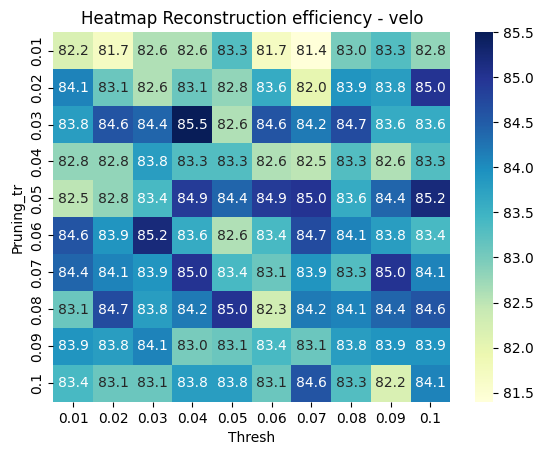

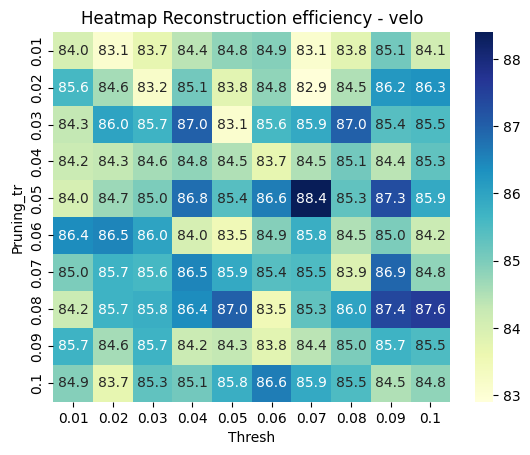

In [166]:
# Example usage to select the first value in the 'metric' column
heat_map_sample(experiment_1, metric='velo', metric_index=0)
heat_map_sample(experiment_1, metric='velo', metric_index=1)